# **Task 4 :- To Explore Decision Tree Algorithm**

**For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

**Dataset** : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

**Importing the libraries and Dataset.**

In [24]:
import pandas as  pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics

In [25]:
iris  = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
print('\n''Shape of Iris Dataset:',iris.shape)  # Shape of the Dataset.
print('\n''Name of columns:-''\n',iris.columns)  #Check The of the Dataset Cloumns. 


Shape of Iris Dataset: (150, 6)

Name of columns:-
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [27]:
iris.drop('Id',axis = 1, inplace = True)

In [28]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [31]:
print(iris['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [32]:
print('\n''Quantity of the Species :-''\n''\n',iris['Species'].value_counts())


Quantity of the Species :-

 Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


In [33]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Data Visualization

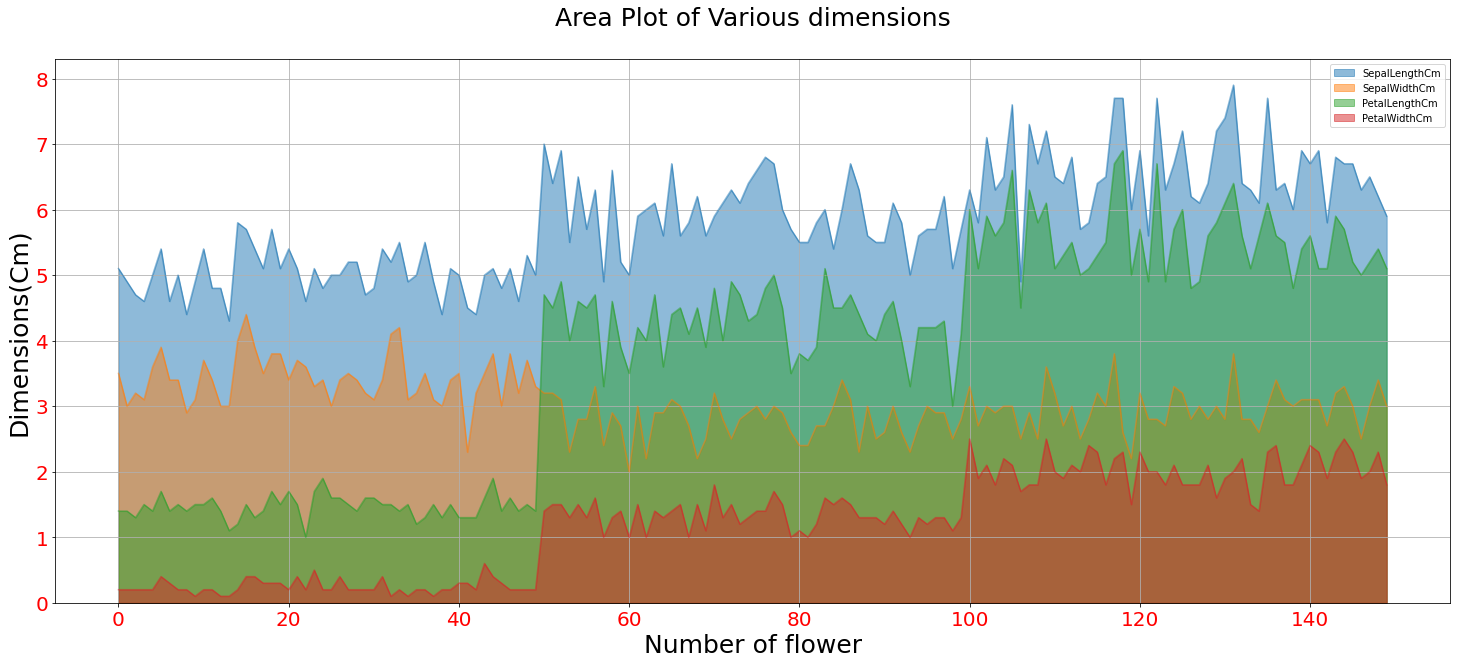

In [34]:
iris.plot.area(y=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],figsize= (25,10),stacked = False )

plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Area Plot of Various dimensions' '\n',color='black',size = 25)
plt.xlabel('Number of flower',color='black',size = 25)
plt.ylabel('Dimensions(Cm)',color='black',size = 25)
plt.grid()
plt.show()

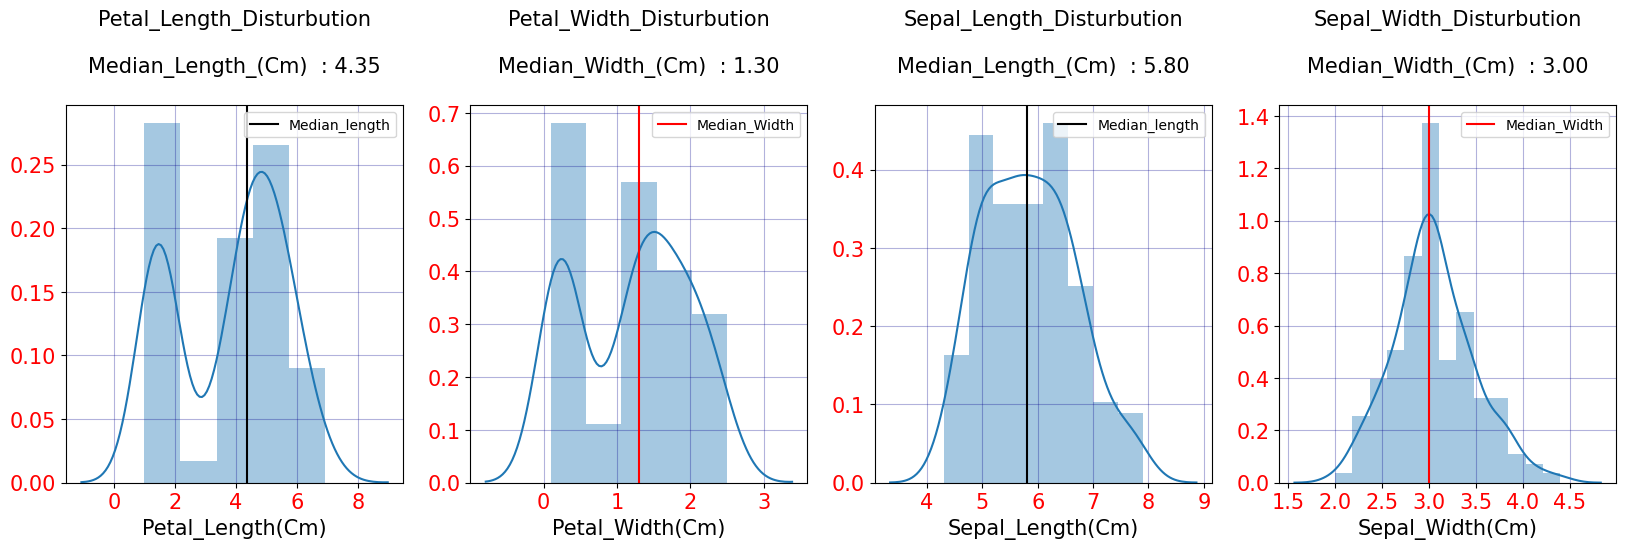

In [35]:
Fig = plt.figure(figsize = (20,5), dpi = 100)
Axis1 = plt.subplot(1, 4, 1)

g = sea.distplot(iris['PetalLengthCm'], ax=Axis1)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis1.set_xlabel('Petal_Length(Cm)' ,color='black',size = 15)
Axis1.set_title('Petal_Length_Disturbution' '\n' '\n' 'Median_Length_(Cm)  : {0:.2f}' '\n' .format(iris['PetalLengthCm'].median()),color='black',size = 15)
g.axvline(iris['PetalLengthCm'].median(),color = 'black',label = 'Median_length')
Axis1.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')

Axis2 = plt.subplot(1, 4, 2)
g = sea.distplot(iris['PetalWidthCm'], ax=Axis2)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis2.set_xlabel('Petal_Width(Cm)' ,color='black',size = 15)
Axis2.set_title('Petal_Width_Disturbution' '\n' '\n' 'Median_Width_(Cm)  : {0:.2f}' '\n' .format(iris['PetalWidthCm'].median()),color='black',size = 15)
g.axvline(iris['PetalWidthCm'].median(),color = 'red',label = 'Median_Width')
Axis2.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')

Axis3 = plt.subplot(1, 4, 3)
g = sea.distplot(iris['SepalLengthCm'], ax=Axis3)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis3.set_xlabel('Sepal_Length(Cm)' ,color='black',size = 15)
Axis3.set_title('Sepal_Length_Disturbution' '\n' '\n' 'Median_Length_(Cm)  : {0:.2f}' '\n' .format(iris['SepalLengthCm'].median()),color='black',size = 15)
g.axvline(iris['SepalLengthCm'].median(),color = 'black',label = 'Median_length')
Axis3.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')
plt.grid(color = 'darkBlue', alpha = 0.3)


Axis4 = plt.subplot(1, 4, 4)
g = sea.distplot(iris['SepalWidthCm'], ax=Axis4)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis4.set_xlabel('Sepal_Width(Cm)' ,color='black',size = 15)
Axis4.set_title('Sepal_Width_Disturbution' '\n' '\n' 'Median_Width_(Cm)  : {0:.2f}' '\n' .format(iris['SepalWidthCm'].median()),color='black',size = 15)
g.axvline(iris['SepalWidthCm'].median(),color = 'red',label = 'Median_Width')
Axis4.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.show()

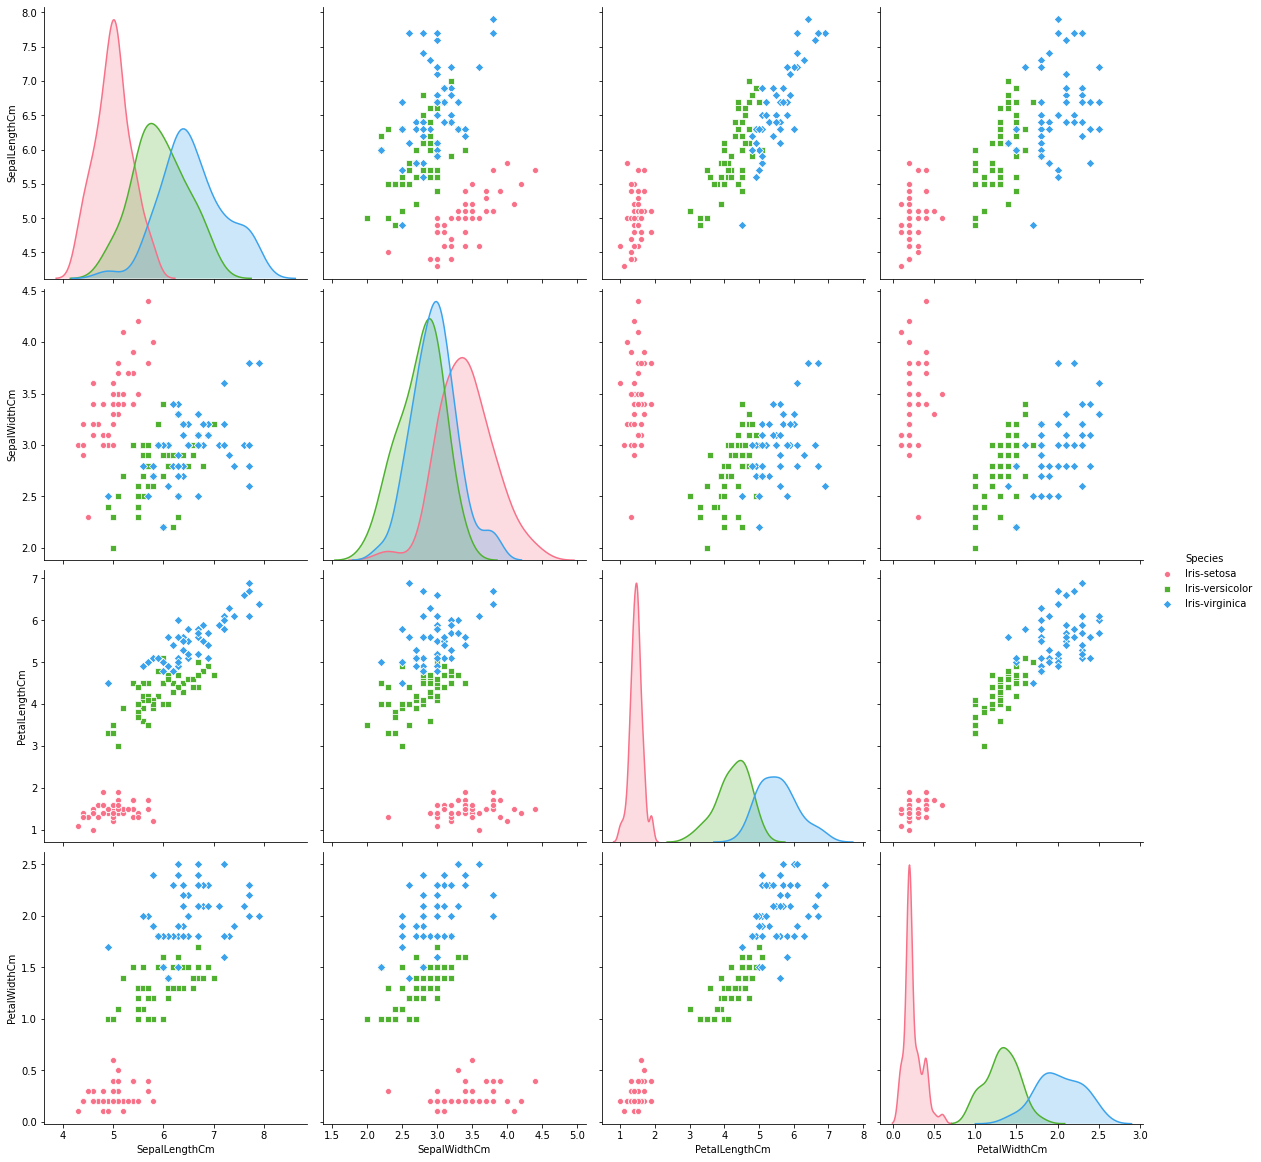

In [36]:
sea.pairplot(data = iris, hue = 'Species',palette="husl",markers=["o", "s", "D"],height=4)
plt.show()

Data Prepatation.

In [37]:
iris_data=iris.drop('Species',axis = 1).to_numpy()
iris_species= iris['Species'].to_numpy()
y_target = LabelEncoder().fit_transform(iris_species)
y_target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
X_train, X_test, Y_train, Y_test  = train_test_split(iris_data, y_target, test_size = 0.2, random_state = 3)
Decision_Tree_Classifier = DecisionTreeClassifier()
Decision_Tree_Classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
Prediction = Decision_Tree_Classifier.predict(X_test)
Prediction

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 2, 1])

In [40]:
from sklearn.metrics import accuracy_score
print('The accuracy of the Decision_Tree_Classifier is',accuracy_score(Y_test, Prediction)*100)

The accuracy of the Decision_Tree_Classifier is 96.66666666666667


In [41]:
print('\n''Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Prediction))  
print('\n''Root Mean Absolute Error:', np.sqrt(metrics.mean_absolute_error(Y_test, Prediction)))
print('\n''Mean Squared Error:', metrics.mean_squared_error(Y_test, Prediction))  
print('\n''Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Prediction)))


Mean Absolute Error: 0.03333333333333333

Root Mean Absolute Error: 0.18257418583505536

Mean Squared Error: 0.03333333333333333

Root Mean Squared Error: 0.18257418583505536


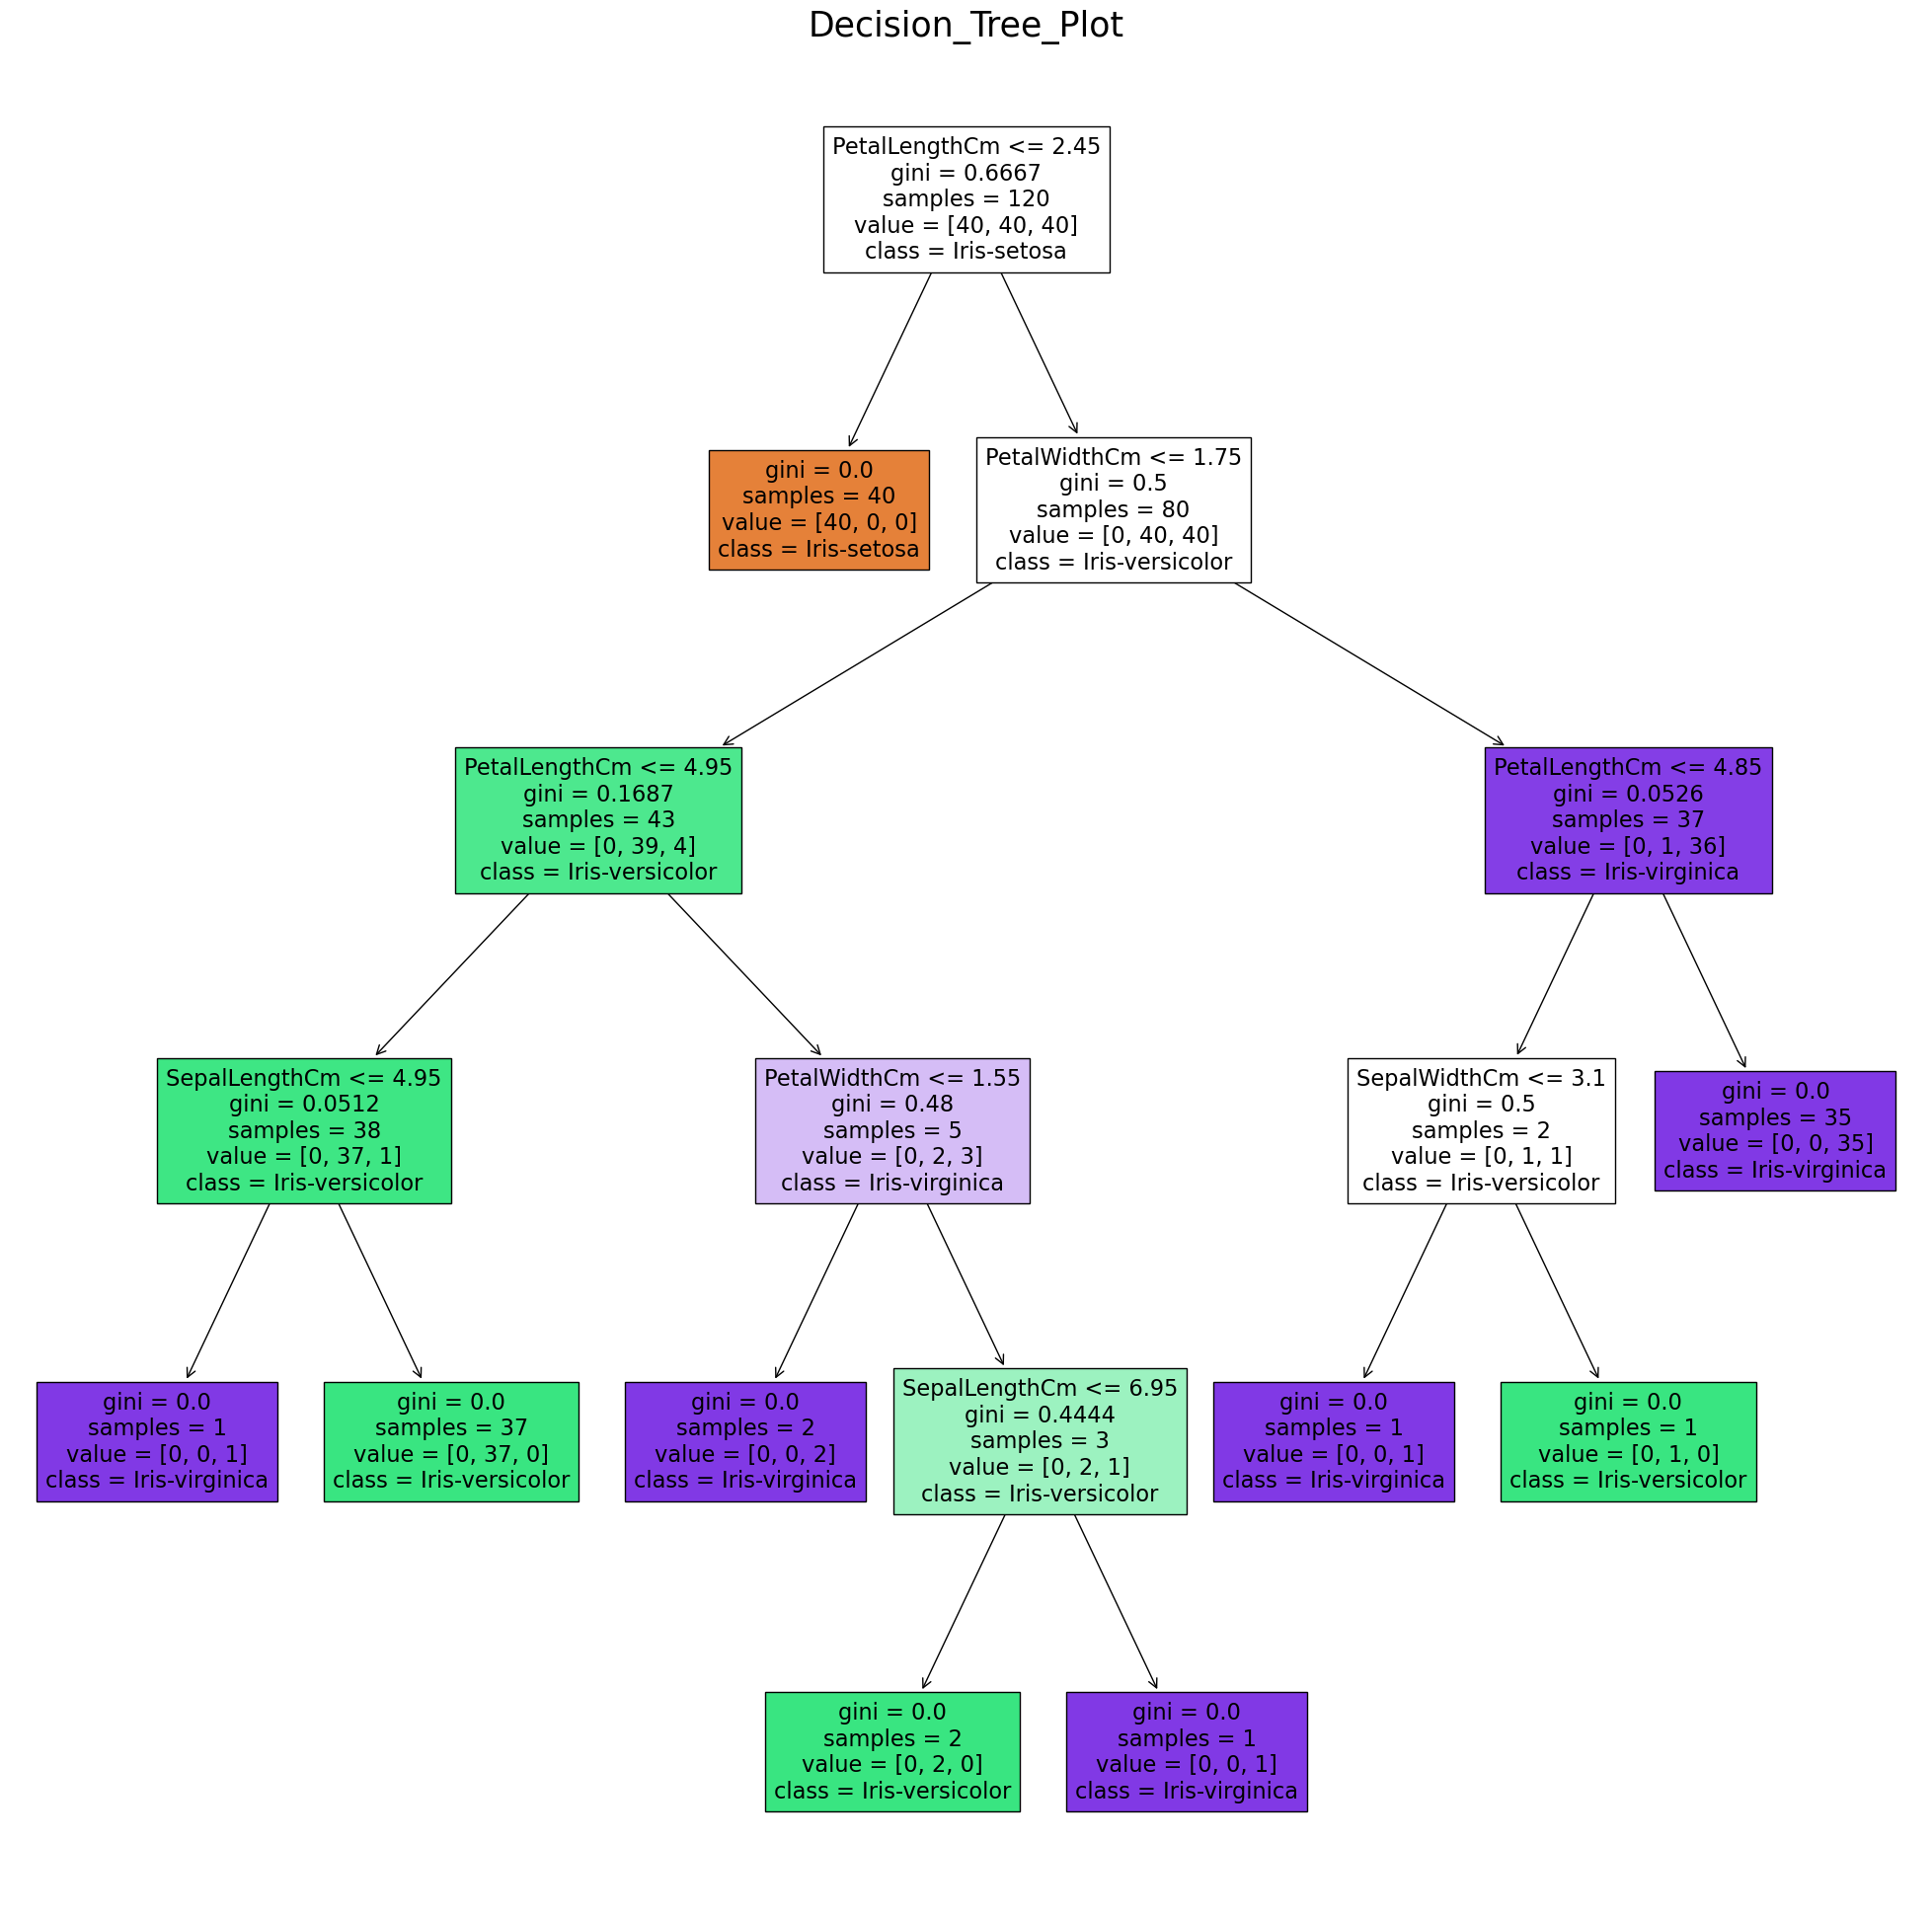

In [42]:
plt.figure(figsize = (25,25),dpi = 100)
tree_plot= plot_tree(Decision_Tree_Classifier,feature_names = iris.columns,class_names = iris['Species'].unique().tolist(),precision = 4,label='all',filled = True)
plt.title('Decision_Tree_Plot',color='black',size = 25)
plt.show()

In [43]:
X_train, X_test, Y_train, Y_test  = train_test_split(iris_data, iris_species, test_size = 0.2, random_state = 3)
Decision_Tree_Classifier = DecisionTreeClassifier()
Decision_Tree_Classifier.fit(X_train,Y_train)

new_data = [[6.3, 3.4, 5.6, 2.4],[2.3, 1.4, 3.6, 0.4]]
Decision_Tree_Classifier.predict(new_data)

array(['Iris-virginica', 'Iris-setosa'], dtype=object)

Accuracy of the modal is 96.33

Train 80% of data and test 20% of data
